Sonal Shitole BC56

K-MEANS

reference : https://www.kaggle.com/code/maguser/clusters

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/LP-3/ML/6/sales_data_sample.csv" ,encoding='unicode_escape')

In [ ]:
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
df.shape

(2823, 25)

In [ ]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  SALES  \
0           False            False      False            False  False   
1           False            False      False            False  False   
2           False            False      False            False  False   
3           False            False      False            False  False   
4           False            False      False            False  False   
...           ...              ...        ...              ...    ...   
2818        False            False      False            False  False   
2819        False            False      False            False  False   
2820        False            False      False            False  False   
2821        False            False      False            False  False   
2822        False            False      False            False  False   

      ORDERDATE  STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  ADDR

In [ ]:
df = df.drop(['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER'] ,axis=1)
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [ ]:
df.shape   sns.barplot(x=df['Country'].value_counts())

(2823, 14)

In [ ]:
df.isna().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

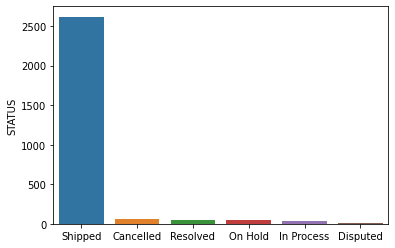

In [ ]:
sns.barplot(x=df["STATUS"].value_counts().index, y=df["STATUS"].value_counts(), data=df)

Clusters for STATUS feature are not well distributed ,so drop this feature

In [ ]:
df.drop(columns=['STATUS'], axis=1, inplace=True)

In [ ]:
df.shape

(2823, 13)

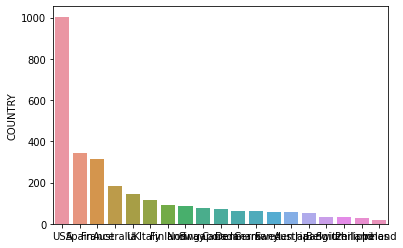

In [ ]:
sns.barplot(x=df["COUNTRY"].value_counts().index, y=df["COUNTRY"].value_counts(), data=df)

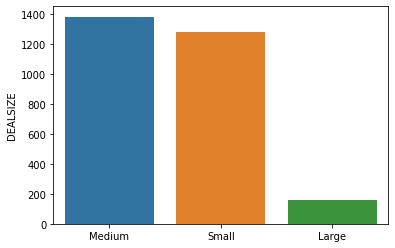

In [ ]:
sns.barplot(x=df["DEALSIZE"].value_counts().index, y=df["DEALSIZE"].value_counts(), data=df)

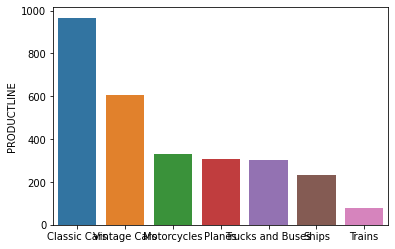

In [ ]:
sns.barplot(x=df["PRODUCTLINE"].value_counts().index, y=df["PRODUCTLINE"].value_counts(), data=df)

We have month ,year given so dropping ORDERDATE feature

In [ ]:
df.drop('ORDERDATE', axis=1, inplace=True)

In [ ]:
df.shape

(2823, 12)

In [ ]:
df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,4,10,2003,Motorcycles,95,S10_1678,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,4,12,2004,Ships,54,S72_3212,Spain,Small
2819,29,100.00,1,3978.51,1,1,2005,Ships,54,S72_3212,Finland,Medium
2820,43,100.00,4,5417.57,1,3,2005,Ships,54,S72_3212,Spain,Medium
2821,34,62.24,1,2116.16,1,3,2005,Ships,54,S72_3212,France,Small


Now , to apply k-means ,categorical features need to be converted into numerical .

We can do it two ways :

 1.replace()                    
 2.get_dummies()

 Replacing the values is not the most efficient way to convert them. Pandas provide a method called get_dummies which will return the dummy variable columns.

 https://www.geeksforgeeks.org/how-to-convert-categorical-variable-to-numeric-in-pandas/

In [ ]:
def dummies(x):  # x is a feature
  dummy = pd.get_dummies(df[x])
  df.drop(columns=x, inplace=True)
  return pd.concat([df, dummy], axis = 1)

In [ ]:
df =  dummies('COUNTRY')         

In [ ]:
df =  dummies('DEALSIZE')

In [ ]:
df =  dummies('PRODUCTLINE')

In [ ]:
df.head(5)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Large,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,30,95.70,2,2871.00,1,2,2003,95,S10_1678,0,...,0,0,1,0,1,0,0,0,0,0
1,34,81.35,5,2765.90,2,5,2003,95,S10_1678,0,...,0,0,1,0,1,0,0,0,0,0
2,41,94.74,2,3884.34,3,7,2003,95,S10_1678,0,...,0,1,0,0,1,0,0,0,0,0
3,45,83.26,6,3746.70,3,8,2003,95,S10_1678,0,...,0,1,0,0,1,0,0,0,0,0
4,49,100.00,14,5205.27,4,10,2003,95,S10_1678,0,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
df.dtypes

QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
MSRP                  int64
PRODUCTCODE          object
Australia             uint8
Austria               uint8
Belgium               uint8
Canada                uint8
Denmark               uint8
Finland               uint8
France                uint8
Germany               uint8
Ireland               uint8
Italy                 uint8
Japan                 uint8
Norway                uint8
Philippines           uint8
Singapore             uint8
Spain                 uint8
Sweden                uint8
Switzerland           uint8
UK                    uint8
USA                   uint8
Large                 uint8
Medium                uint8
Small                 uint8
Classic Cars          uint8
Motorcycles           uint8
Planes                uint8
Ships                 uint8
Trains              

PRODUCTCODE datatype :

Using the standard pandas Categorical constructor, we can create a category object.

In [ ]:
cat = pd.Categorical(df['PRODUCTCODE'])
cat

['S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', ..., 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212']
Length: 2823
Categories (109, object): ['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', ..., 'S700_3962',
                           'S700_4002', 'S72_1253', 'S72_3212']

Codes are an array of integers which are the positions of the actual values in the categories array.

In [ ]:
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes

In [ ]:
df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Large,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,30,95.70,2,2871.00,1,2,2003,95,0,0,...,0,0,1,0,1,0,0,0,0,0
1,34,81.35,5,2765.90,2,5,2003,95,0,0,...,0,0,1,0,1,0,0,0,0,0
2,41,94.74,2,3884.34,3,7,2003,95,0,0,...,0,1,0,0,1,0,0,0,0,0
3,45,83.26,6,3746.70,3,8,2003,95,0,0,...,0,1,0,0,1,0,0,0,0,0
4,49,100.00,14,5205.27,4,10,2003,95,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,4,12,2004,54,108,0,...,0,0,1,0,0,0,1,0,0,0
2819,29,100.00,1,3978.51,1,1,2005,54,108,0,...,0,1,0,0,0,0,1,0,0,0
2820,43,100.00,4,5417.57,1,3,2005,54,108,0,...,0,1,0,0,0,0,1,0,0,0
2821,34,62.24,1,2116.16,1,3,2005,54,108,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
df.shape

(2823, 38)

drop 'ORDERDATE', 'QTR_ID' because we have 'MONTH' etc.

In [ ]:
df.drop('QTR_ID', axis=1, inplace=True)

In [ ]:
df.shape

(2823, 37)

Use K-MEANS algorithm

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
from sklearn.cluster import KMeans
scores = []
range_values = range(1, 15)
for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled)
  scores.append(kmeans.inertia_)

  # Inertia measures how well a dataset was clustered by K-Means. 
  # It is calculated by 
  # measuring the distance between each data point and its centroid, squaring this distance,
  #  and summing these squares across one cluster.

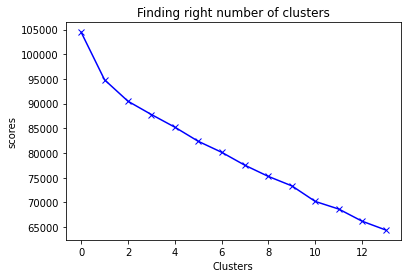

In [ ]:
plt.plot(scores, 'bx-') # bx is blue line and x on it and - is solid line
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show();

Text(0, 0.5, 'scores')

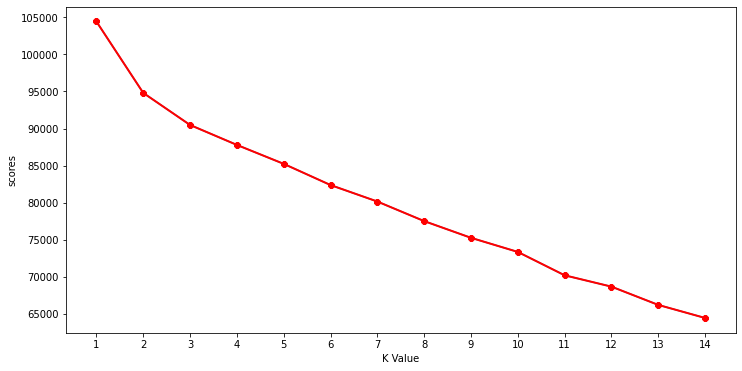

In [ ]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,15),scores)
plt.plot(range(1,15),scores, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
# plt.xticks(np.arange(1,15,1))
plt.ylabel("scores")

In [ ]:
#Taking 3 clusters
km1=KMeans(n_clusters=3)
#Fitting the input data
km1.fit(df_scaled)
#predicting the labels of the input data
y=km1.predict(df_scaled)
#adding the labels to a column named label
df["cluster"] = y
#The new dataframe with the clustering done
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,cluster
0,30,95.70,2,2871.00,2,2003,95,0,0,0,...,0,1,0,1,0,0,0,0,0,2
1,34,81.35,5,2765.90,5,2003,95,0,0,0,...,0,1,0,1,0,0,0,0,0,2
2,41,94.74,2,3884.34,7,2003,95,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,45,83.26,6,3746.70,8,2003,95,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,49,100.00,14,5205.27,10,2003,95,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [ ]:
df.YEAR_ID.unique()

array([2003, 2004, 2005])

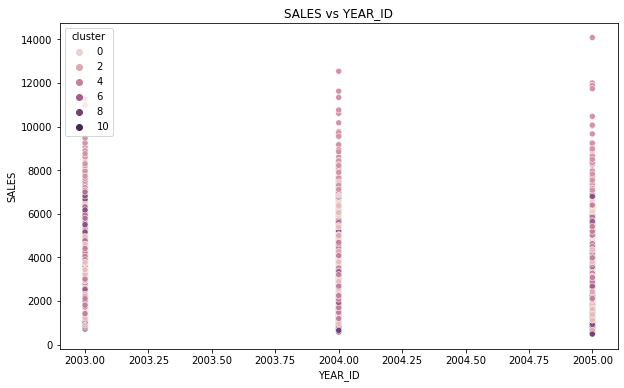

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'YEAR_ID',y = 'SALES',hue="cluster",data = df )
plt.xlabel('YEAR_ID')
plt.ylabel('SALES') 
plt.title('SALES vs YEAR_ID')
plt.show()
# ,  palette=['green','dodgerblue','red'], legend='full',

In [ ]:
df.MONTH_ID.unique()

array([ 2,  5,  7,  8, 10, 11, 12,  1,  4,  6,  9,  3])

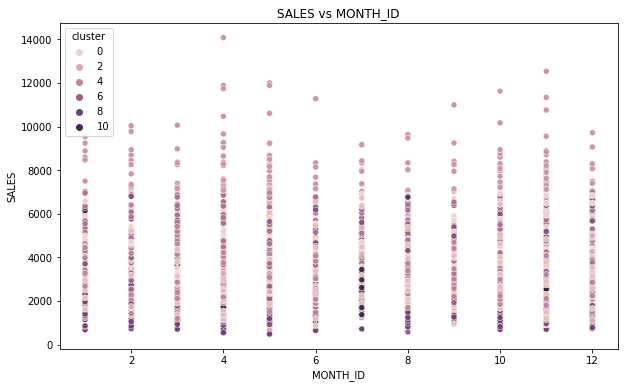

In [ ]:
#Taking 12 clusters
km1=KMeans(n_clusters=12)
#Fitting the input data
km1.fit(df_scaled)
#predicting the labels of the input data
y=km1.predict(df_scaled)
#adding the labels to a column named label
df["cluster"] = y
#The new dataframe with the clustering done
df.head()


#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'MONTH_ID',y = 'SALES',hue="cluster",data = df  )
plt.xlabel('MONTH_ID')
plt.ylabel('SALES') 
plt.title('SALES vs MONTH_ID')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
scores=[]
for i in range(1,15):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df_scaled)
  scores.append(kmeans.inertia_)